https://stepik.org/lesson/1576178/step/6

In [ ]:
from sklearn.datasets import load_wine
import torch


wine_data = load_wine()

# Признаки и целевые значения
_global_var_data_x = torch.tensor(wine_data.data, dtype=torch.float32)
_global_var_target = torch.tensor(wine_data.target, dtype=torch.int64)

# Размеры и типы
print("Размеры и типы:", _global_var_data_x.shape, _global_var_data_x.dtype, _global_var_target.shape, _global_var_target.dtype)

# Прочие характеристики
print("Количество классов: ", len(wine_data.target_names))
print("Названия классов: ", wine_data.target_names)
print("Названия признаков: ", wine_data.feature_names)

# Первые строки данных
print("Первые 5 строк признаков:\n", _global_var_data_x[:5])
print("Первые 5 целевых значений:\n", y[:5])


Размеры и типы: torch.Size([178, 13]) torch.float32 torch.Size([178]) torch.int64
Количество классов:  3
Названия классов:  ['class_0' 'class_1' 'class_2']
Названия признаков:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [ ]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim


class WineDataset(data.Dataset):
    def __init__(self):
        self.data = _global_var_data_x   # тензор размерностью (178, 13), тип float32
        self.target = _global_var_target # тензор размерностью (178, ), тип int64 (long)

        self.length = len(self.target)
        self.categories = ['class_0' 'class_1' 'class_2'] # названия классов

    def __getitem__(self, item):
        return self.data[item], self.target[item],

    def __len__(self):
        return self.length

class WineClassModel(nn.Module):
    def __init__(self, in_features=13, out_features=3):
        super().__init__()
        self.layer1 = nn.Linear(in_features, 32)
        self.layer2 = nn.Linear(32, 16)
        self.layer3 = nn.Linear(16, out_features)

    def forward(self, x):
        x = self.layer1(x).relu()
        x = self.layer2(x).relu()
        x = self.layer3(x)
        return x

# Создание модели WineClassModel и перевод в режим обучения
model = WineClassModel(13, 3)
model.train()

# Параметры градиентного спуска
epochs = 20     # число эпох обучения
batch_size = 16 # размер батча
lr = 0.01

# Создание объекта с разбиением на батчи
d_train = WineDataset()
train_data = data.DataLoader(d_train, batch_size, shuffle=True, drop_last=False)

# Оптимизатор и функция потерь
optimizer = optim.Adam(params=model.parameters(), lr=lr)
loss_func = torch.nn.CrossEntropyLoss()

# Градиентный спуск
for _e in range(epochs): # итерации по эпохам
    for x_train, y_train in train_data:
        predict = model(x_train).squeeze()
        loss = loss_func(predict, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Перевод модели в режим эксплуатации
model.eval()

# Прогноз модели по всем данным выборки
y_pred = torch.argmax(model(d_train.data), dim=1)

# Качество
Q = (y_pred.data == d_train.target).sum().item() / len(d_train)
# print(Q)

0.9269662921348315


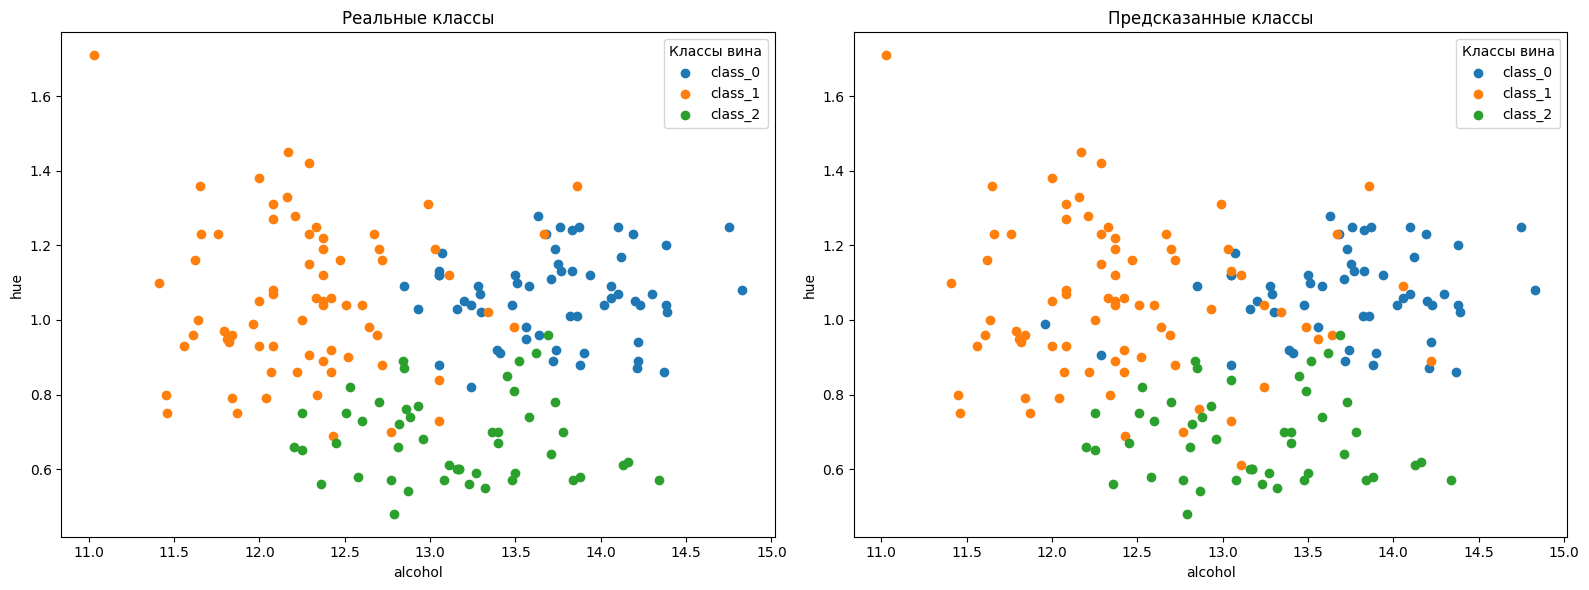

In [ ]:
# График
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Ещё раз загрузим исходник, так проще
wine_data = load_wine()

# Две доски под графики
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

'''Выбираем два признака для визуализации, например, алкголь и цветность'''

feature1 = wine_data.data[:, 0]  # Алкоголь
feature2 = wine_data.data[:, 10] # Цветность

# График 1: Реальные классы
for i, target_name in enumerate(wine_data.target_names):
    axs[0].scatter(feature1[wine_data.target == i], feature2[wine_data.target == i], label=target_name)

axs[0].set_xlabel(wine_data.feature_names[0])  # Алкоголь
axs[0].set_ylabel(wine_data.feature_names[10]) # Цветность
axs[0].set_title("Реальные классы")
axs[0].legend(loc="upper right", title="Классы вина")

# График 2: Предсказанные классы
for i, target_name in enumerate(wine_data.target_names):
    axs[1].scatter(feature1[y_pred.data == i], feature2[y_pred.data == i], label=target_name)

axs[1].set_xlabel(wine_data.feature_names[0])  # Алкоголь
axs[1].set_ylabel(wine_data.feature_names[10]) # Цветность
axs[1].set_title("Предсказанные классы")
axs[1].legend(loc="upper right", title="Классы вина")

# Отображаем
plt.tight_layout()
plt.show()